#2ª Análise: Receita por Visitas

Grupo: Fabiano Antunes, Gabriela Araújo e Mariana Guimarães.

### Chamando as bibliotecas necessárias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px


## Resolução 1:
É feita a leitura e junção dos dados utilizando o pandas, o preenchimento dos valores ausentes da receita com 0 e ordenação dos dados.

In [ ]:
visitas = pd.read_csv('visitas-1.csv')
receita = pd.read_csv('receita.csv')

df_merged = pd.merge(visitas, receita, on='id_visita', how='left')
df_merged = pd.DataFrame(df_merged)

df_merged['receita'] = df_merged['receita'].fillna(0)

df = df_merged.sort_values('id_cliente').reset_index(drop=True)

display(df.head(10))
df.info()

,id_cliente,id_visita,receita
0,1111,sqn3353,0.00
1,1111,vtt8722,0.00
2,1111,jpa5427,597.54
3,1111,wsx2216,0.00
4,1111,cue5663,0.00
5,1111,uxz7356,0.00
6,1111,bbh4338,0.00
7,1111,sdm2566,0.00
8,1111,kac6372,0.00
9,1111,qns5173,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993078 entries, 0 to 993077
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_cliente  993078 non-null  int64  
 1   id_visita   993078 non-null  object 
 2   receita     993078 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 22.7+ MB


##Resolução 2: Estatísticas por cliente

É feito o agrupamento por cliente e depois calculado a média da receita considerando todas as visitas, a média considerando só visitas que geraram receita e o percentual de visitas com receita maior que 0. Para o percentual, é feito um `count` em cima da coluna criada somente com valores de receita maiores que 0 (usado também no cálculo da segunda média), um `count` em cima do total de visitas e a divisão entre esses `count` respectivamente. Como são criadas suas colunas em stats, usa-se `.drop()` para removê-las após a utilização nos cálculos.

In [ ]:
# stats = df_selected.groupby('Product_Code')['Transaction_Value'].agg(['mean', 'median', 'std', 'min', 'max'])
df['receita_positiva'] = df['receita'].where(df['receita'] > 0.0)

stats = df.groupby('id_cliente').agg(
    media_total = ('receita', 'mean'),
    media_so_com_receita = ('receita_positiva', 'mean'),
    visitas_com_receita = ('receita_positiva', 'count'),
    total_visitas = ('receita', 'count')
).reset_index()

stats['percentual_receita'] = (stats['visitas_com_receita']/stats['total_visitas'])*100
stats = stats.drop(columns=['visitas_com_receita', 'total_visitas'])

display(stats)


,id_cliente,media_total,media_so_com_receita,percentual_receita
0,1111,52.174383,613.049000,8.510638
1,1112,82.266157,753.558000,10.917031
2,1113,107.288046,800.062286,13.409962
3,1114,67.600250,676.002500,10.000000
4,1115,110.904764,1083.454231,10.236220
...,...,...,...,...
4091,8884,38.639961,620.654375,6.225681
4092,8885,89.166338,1460.956154,6.103286
4093,8886,91.069057,877.574545,10.377358
4094,8887,51.585422,676.040526,7.630522


##Resolução 3: Simulação de Amostragem Bootstrap

Faz 1000 amostragens com reposição.
Em cada amostra, calcula a média da coluna receita.

In [ ]:
tamanho = len(df)
medias, ids_simulacao = [], []

for i in range(1000):
    amostra = df.sample(n = tamanho, replace = True)
    media = amostra['receita'].mean()
    medias.append(media)
    ids_simulacao.append(i)

simulacoes = pd.DataFrame({
    'id_simulacao': ids_simulacao,
    'media_amostrada': medias
})

simulacoes.head(10)

,id_simulacao,media_amostrada
0,0,100.468142
1,1,99.836319
2,2,100.301636
3,3,100.086566
4,4,100.331521
5,5,99.741751
6,6,99.486718
7,7,100.483088
8,8,100.750737
9,9,100.508630


##Resolução 4: Visualização da Distribuição - Gráfico

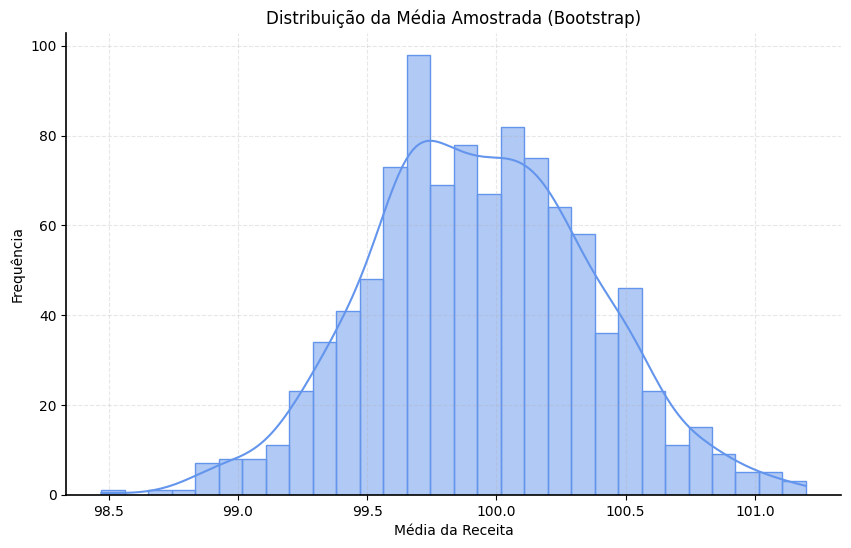

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(simulacoes['media_amostrada'], kde=True, bins=30, color="cornflowerblue",edgecolor="cornflowerblue")
plt.title('Distribuição da Média Amostrada (Bootstrap)')
plt.xlabel('Média da Receita')
plt.ylabel('Frequência')

"""Estilo dos eixos (bordas)"""
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['left'].set_linewidth(1.2)
ax.grid(True, linestyle='--', alpha=0.3)

plt.show()
